# **Linear Regression**

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\91939\Downloads\Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
frame = df.loc["Serial No.":]
frame

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
frame = list(df.columns)

In [9]:
df.columns[[8]]

Index(['Chance of Admit '], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000272440A23C8>]],
      dtype=object)

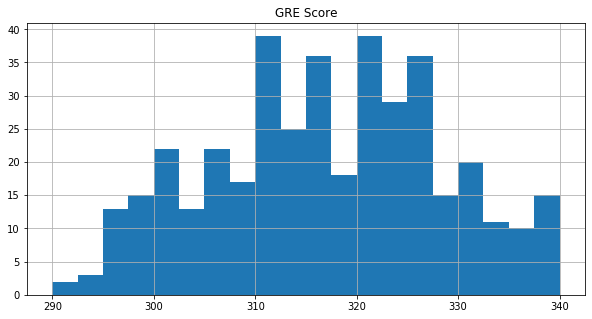

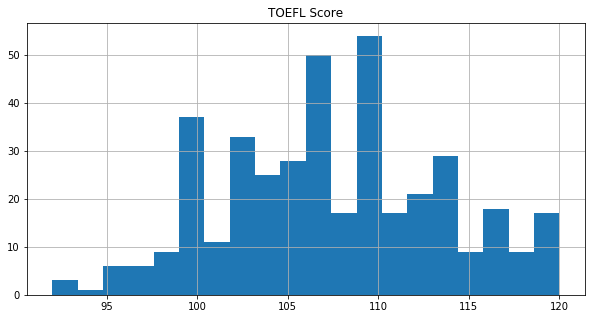

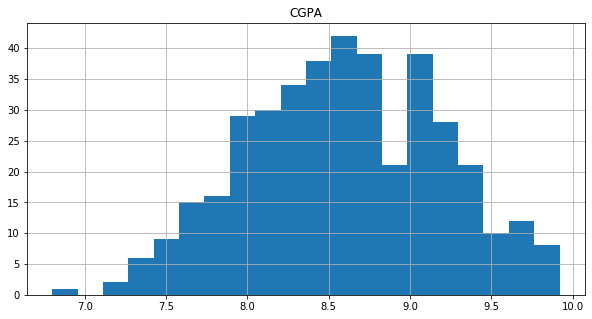

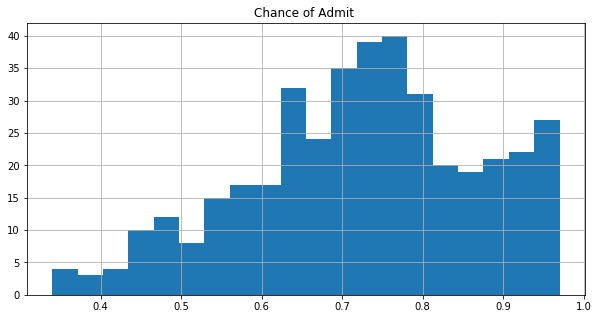

In [10]:
# Plotting graphs
df.hist(column="GRE Score", bins=20, figsize=(10,5))
df.hist(column="TOEFL Score", bins=20, figsize=(10,5))
df.hist(column="CGPA", bins=20, figsize=(10,5))
df.hist(column="Chance of Admit ", bins=20, figsize=(10,5))

In [11]:
df.loc[1]

Serial No.             2.00
GRE Score            324.00
TOEFL Score          107.00
University Rating      4.00
SOP                    4.00
LOR                    4.50
CGPA                   8.87
Research               1.00
Chance of Admit        0.76
Name: 1, dtype: float64

In [12]:
X_df = df.drop(df.columns[[0, 2, 3, 4, 5, 6, 7, 8]], axis = 1)
Y_df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7]], axis = 1)

In [13]:
X_df.head()

,GRE Score
0,337
1,324
2,316
3,322
4,314


In [14]:
Y_df.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [15]:
x_df = X_df.to_numpy()
y_df = Y_df.to_numpy()

In [16]:
x_df

array([[337],
       [324],
       [316],
       [322],
       [314],
       [330],
       [321],
       [308],
       [302],
       [323],
       [325],
       [327],
       [328],
       [307],
       [311],
       [314],
       [317],
       [319],
       [318],
       [303],
       [312],
       [325],
       [328],
       [334],
       [336],
       [340],
       [322],
       [298],
       [295],
       [310],
       [300],
       [327],
       [338],
       [340],
       [331],
       [320],
       [299],
       [300],
       [304],
       [307],
       [308],
       [316],
       [313],
       [332],
       [326],
       [322],
       [329],
       [339],
       [321],
       [327],
       [313],
       [312],
       [334],
       [324],
       [322],
       [320],
       [316],
       [298],
       [300],
       [311],
       [309],
       [307],
       [304],
       [315],
       [325],
       [325],
       [327],
       [316],
       [318],
       [328],
       [332],
      

In [17]:
y_df

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62],
       [0.64],
       [0.7 ],
       [0.94],
       [0.95],
       [0.97],
       [0.94],
       [0.76],
       [0.44],
       [0.46],
       [0.54],
       [0.65],
       [0.74],
       [0.91],
       [0.9 ],
       [0.94],
       [0.88],
       [0.64],
       [0.58],
       [0.52],
       [0.48],
       [0.46],
       [0.49],
       [0.53],
       [0.87],
       [0.91],
       [0.88],
       [0.86],
       [0.89],
       [0.82],
       [0.78],
       [0.76],
       [0.56],
       [0.78],
       [0.72],
       [0.7 ],
       [0.64],
       [0.64],
       [0.46],
       [0.36],
       [0.42],
       [0.48],
       [0.47],
       [0.54],
       [0.56],
       [0.52],
       [0.55],
       [0.

In [18]:
for i in range(len(y_df)):
    if y_df[i] > 0.75:
        y_df[i] = 1
    else:
        y_df[i] = 0
        
y_df

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],

In [19]:
Y_df = pd.DataFrame(y_df)
Y_df

,0
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
395,1.0
396,1.0
397,1.0
398,0.0


In [20]:
print("Shape x_df : ", x_df.shape)
print("Shape y_df : ", y_df.shape)

Shape x_df :  (400, 1)
Shape y_df :  (400, 1)


In [21]:
#plt.scatter(x_df, y_df)
#plt

In [22]:
X_df = pd.DataFrame(x_df)
X_df

,0
0,337
1,324
2,316
3,322
4,314
...,...
395,324
396,325
397,330
398,312


In [23]:
X_train = X_df.sample(frac = 0.8, random_state = 200)
X_test = X_df.drop(X_train.index)

Y_train = Y_df.sample(frac = 0.8, random_state = 200)
Y_test = Y_df.drop(Y_train.index)

In [24]:
X_train_arr = X_train.to_numpy()
X_test_arr = X_test.to_numpy()
Y_train_arr = Y_train.to_numpy()
Y_test_arr = Y_test.to_numpy()

In [25]:
print("Input Train Shape : ", X_train_arr.shape)
print("Input Test Shape : ", X_test_arr.shape)

Input Train Shape :  (320, 1)
Input Test Shape :  (80, 1)


In [26]:
print("Output Train Shape : ", Y_train_arr.shape)
print("Output Test Shape : ", Y_test_arr.shape)

Output Train Shape :  (320, 1)
Output Test Shape :  (80, 1)


In [27]:
X_train_arr

array([[301],
       [300],
       [317],
       [298],
       [322],
       [329],
       [312],
       [315],
       [319],
       [311],
       [335],
       [315],
       [297],
       [324],
       [327],
       [312],
       [331],
       [316],
       [331],
       [312],
       [308],
       [320],
       [326],
       [317],
       [313],
       [308],
       [317],
       [321],
       [313],
       [296],
       [305],
       [306],
       [300],
       [327],
       [321],
       [327],
       [328],
       [324],
       [312],
       [311],
       [328],
       [321],
       [305],
       [317],
       [321],
       [326],
       [310],
       [317],
       [327],
       [298],
       [323],
       [312],
       [302],
       [316],
       [325],
       [322],
       [320],
       [324],
       [320],
       [307],
       [319],
       [296],
       [300],
       [320],
       [338],
       [299],
       [295],
       [303],
       [316],
       [326],
       [302],
      

In [28]:
Y_train_arr

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

<module 'matplotlib.pyplot' from 'C:\\Users\\91939\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

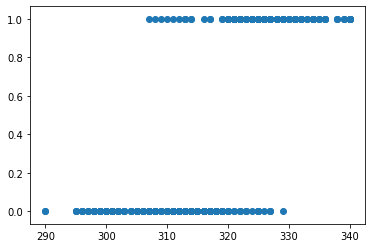

In [29]:
plt.scatter(X_train_arr, Y_train_arr)
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\91939\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

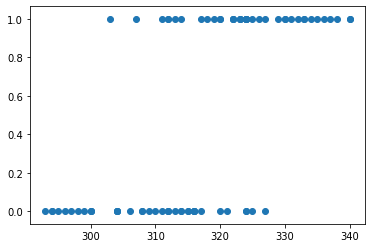

In [30]:
plt.scatter(X_test_arr, Y_test_arr)
plt

In [31]:
def initialize_with_zeros(dim):
    weight = np.zeros((dim, 1))
    bias = 0
    return weight, bias

In [32]:
# hypotesis function

def hypo(x, weight, bias):
    return x * weight + bias

In [33]:
# cost function

def cost(x, y, weight, bias):
    length = len(x)
    train_error = 0
    for i in range(length):
        train_error += (y[i] - hypo(x[i], weight, bias))**2
    return train_error/length

In [34]:
# gradient function

def grad(x, y, weight, bias, alpha):
    weight_deriv = 0
    bias_deriv = 0
    length = len(x)
    grad_list = []
    error_list = []

    for i in range(length):
        weight_deriv += -2 * x[i] * (y[i] - (weight * x[i] + bias))
        bias_deriv += -2 * (y[i] - (weight * x[i] + bias))
        
        error_list.append(cost(x, y, weight, bias)[0])

        # We subtract because the derivatives point in direction of steepest ascent
        weight -= (weight_deriv / length) * alpha
        bias -= (bias_deriv / length) * alpha
        grad_list.append((weight, bias))

    return weight, bias, grad_list, error_list

In [35]:
def train(x, y, weight, bias, alpha, iters):
    cost_history = []

    for i in range(iters):
        weight, bias, grad_list, error_list = grad(x, y, weight, bias, alpha)

        #Calculate cost for auditing purposes
        costs = cost(x, y, weight, bias)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("At Iteration : ", i, " Weight : ", weight, " Bias : ", bias, " Cost : ", costs)

    return weight, bias, cost_history, grad_list, error_list

In [36]:
def predict(final_pred, m):
    m = m.shape[1]
    y_pred = np.zeros((1, m))
    y_prediction = []
    for i in range(final_pred.shape[1]):
        if final_pred[0, i] > 0.5:                    # if final prediction crosses 0.5 declare it 1 else 0    
            y_pred[0, i] = 1
        y_prediction.append(y_pred[0, i])
    return y_prediction

In [37]:
def model():
    alpha = 0.0001
    iters = 1000
    weight, bias = initialize_with_zeros(1)
    costs = cost(X_train_arr, Y_train_arr, weight, bias)
    weight, bias, grad_error, error_list = grad(X_train_arr, Y_train_arr, weight, bias, alpha)
    weight, bias, cost_history, grad_list, error_list = train(X_train_arr, Y_train_arr, weight, bias, alpha, iters)
    print("Weight Shape : ", weight.shape)
    print()
    return weight, bias, cost_history, grad_list, error_list

At Iteration :  0  Weight :  [[-0.00282159]]  Bias :  [[-0.00092552]]  Cost :  [[1.97487334]]
At Iteration :  10  Weight :  [[-0.00347754]]  Bias :  [[-0.00521685]]  Cost :  [[2.5801955]]
At Iteration :  20  Weight :  [[-0.00346321]]  Bias :  [[-0.00948975]]  Cost :  [[2.57925352]]
At Iteration :  30  Weight :  [[-0.00344871]]  Bias :  [[-0.01376092]]  Cost :  [[2.57814285]]
At Iteration :  40  Weight :  [[-0.00343421]]  Bias :  [[-0.01803037]]  Cost :  [[2.57703285]]
At Iteration :  50  Weight :  [[-0.00341972]]  Bias :  [[-0.0222981]]  Cost :  [[2.57592355]]
At Iteration :  60  Weight :  [[-0.00340523]]  Bias :  [[-0.02656411]]  Cost :  [[2.57481497]]
At Iteration :  70  Weight :  [[-0.00339075]]  Bias :  [[-0.0308284]]  Cost :  [[2.57370709]]
At Iteration :  80  Weight :  [[-0.00337628]]  Bias :  [[-0.03509097]]  Cost :  [[2.57259993]]
At Iteration :  90  Weight :  [[-0.00336181]]  Bias :  [[-0.03935182]]  Cost :  [[2.57149347]]
At Iteration :  100  Weight :  [[-0.00334735]]  Bias :

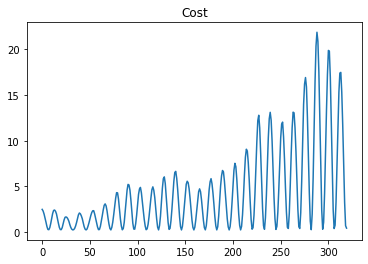

In [38]:
if __name__ == "__main__":
    
    weight, bias, cost_history, grad_list, error_list = model()
    
    final_train_pred = np.dot(weight, X_train_arr.T) + bias
    print("final_train_pred shape : ", final_train_pred.shape)
    print("Y_train_arr shape : ", Y_train_arr.shape)
    print(final_train_pred)
    train_predict = predict(final_train_pred, Y_train_arr.T)
    print("Training Prediction : ", train_predict)
    
    final_test_pred = np.dot(weight, X_test_arr.T) + bias
    test_predict = predict(final_test_pred, Y_test_arr.T)
    print("Testing Prediction : ", test_predict)
    
    plt.plot(error_list)
    plt.title("Cost")
    plt.show()
